<a href="https://colab.research.google.com/github/ipman101/AI/blob/main/gashydrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [260]:
#!pip install pytrr

In [261]:
import re
import numpy as np
import math

def read_gro(file_path):
    try:
        # Open the file in read mode ('r')
        with open(file_path, 'r') as file:
            # Read all lines into a list
            #lines = file.readlines()
            lines = [line.strip() for line in file if line.strip()]

            # Displaying the content of the file
            print(f"Content of the file '{file_path}':")
            return(lines)


    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")

In [262]:
 def format_data(lines):
    length = int(lines[1])
    print(length)
    frames = []
    coordinates = []
    i=0
    x,y,z=[],[],[]
    box = []
    for line in lines:
      if "frame" in line:
        frames.append(re.findall(r'\b\d+\.\d+\b', line))
      if "SOL" in line:
        coordinates.append(re.findall(r'\b\d+\.\d+\b', line))
        i=i+1
      if bool(re.match(r'\b\d+\.\d+\b.*\b\d+\.\d+\b.*\b\d+\.\d+\b', line)) == True:
        box.append(re.findall(r'\b\d+\.\d+\b', line))
    print(i/(len(frames)*4))
    # coordinates=np.array(coordinates)
     #print(coordinates.shape)
    print(type(frames))
    x = [row[0] for row in coordinates]
    y = [row[1] for row in coordinates]
    z = [row[2] for row in coordinates]
    # xyz = [[row[0], row[1], row[2]] for row in coordinates]
    # xyz= np.array(xyz)
    x= np.array(x,dtype=float)
    y= np.array(y,dtype=float)
    z= np.array(z,dtype=float)

    #for i in range(10):
    #  print(box[i])
    return(x,y,z,frames,box)



In [263]:
#applying pbc condition is remaining
def distance(x,y,z,frames,box):
  #arr_x=[]
  #arr_y=[]
  #arr_z=[]
  r1  = [row[0] for row in box]
  r2  = [row[1] for row in box]
  r3  = [row[2] for row in box]
  r1 = np.array(r1,dtype=float)
  size=int(len(x)/len(frames))
  print("size",size)
  r2 = np.array(r2,dtype=float)
  r3 = np.array(r3,dtype=float)
  d = []
  a=0
  b=0
  c=0
  displacement = 0
  for i in range(len(frames)-1):

    print(r1[i],r2[i],r3[i])
    for j in range(size):
      a = (x[j+(size*(i+1))]-x[j+(size*i)])
      b = (y[j+(size*(i+1))]-y[j+(size*i)])
      c = (z[j+(size*(i+1))]-z[j+(size*i)])

      if a > r1[i]/2:
        a = (x[j+(size*(i+1))]-x[j+(size*i)]-r1[i])
      if b > r2[i]/2:
        b = (x[j+(size*(i+1))]-x[j+(size*i)]-r2[i])
      if c > r3[i]/2:
        c = (x[j+(size*(i+1))]-x[j+(size*i)]-r3[i])

      displacement= math.sqrt(a**2+b**2+c**2)
      d.append(displacement)
  # d = (np.sqrt(np.add(np.square(arr_x),np.square(arr_y),np.square(arr_z))))
  #print(len(x))
  print(len(d))
  #print(len(arr_x))
  return(d)

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot(d):
    # Example array of values
    values_array = d

    # Fit a normal distribution to the data
    mu, std = norm.fit(values_array)

    # Plot the histogram of the data
    plt.hist(values_array, bins=2, density=True, alpha=0.6, color='g')

    # Plot the Gaussian curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Add labels and a title
    plt.title("Fit results: mu = %.2f,  std = %.2f" % (mu, std))
    plt.xlabel("Values")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()
    # Example 1D array
    data = d

    # Plot the 1D array
    plt.scatter(range(len(data)), data, marker='.')

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('1D Array Plot')

    # Show the plot
    plt.show()

Content of the file '/home/md_trj.gro':
20230
5000.0
<class 'list'>
11
size= 220000
size 20000
5.30387 5.30387 5.30387
5.30567 5.30567 5.30567
5.29069 5.29069 5.29069
5.3004 5.3004 5.3004
5.28707 5.28707 5.28707
5.28473 5.28473 5.28473
5.29952 5.29952 5.29952
5.29296 5.29296 5.29296
5.29105 5.29105 5.29105
5.28989 5.28989 5.28989
200000


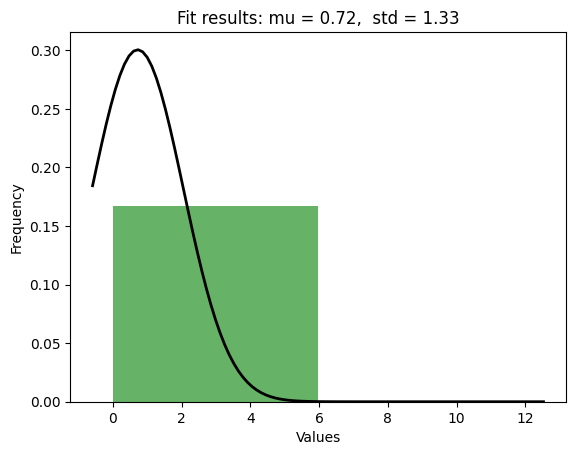

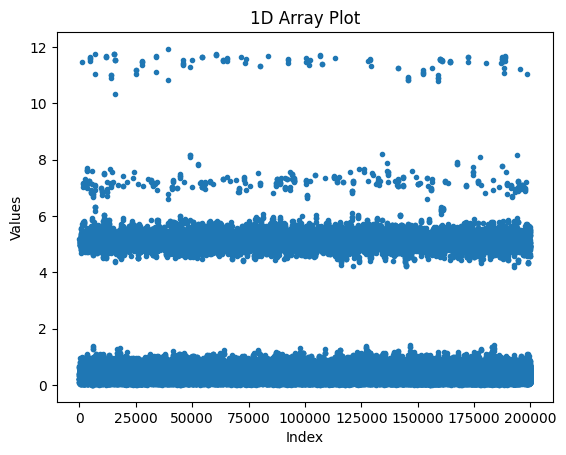

In [265]:
def main():
  lines=read_gro('/home/md_trj.gro')
  x,y,z, frames, box = format_data(lines)
  print(len(frames))
  print("size=",len(x))
  distances = distance(x,y,z,frames,box)
  plot(distances)

main()

In [266]:
#applying pbc condition is remaining
def distance(x,y,z,frames):
  arr_x=[]
  arr_y=[]
  arr_z=[]
  d = []
  for i in range(len(frames)-1):
    for j in range(size):
      arr_x.append(x[j+(size*(i+1))]-x[j+(size*i)])
      arr_y.append(y[j+(size*(i+1))]-y[j+(size*i)])
      arr_z.append(z[j+(size*(i+1))]-z[j+(size*i)])
  d = (np.sqrt(np.add(np.square(arr_x),np.square(arr_y),np.square(arr_z))))
  print(len(x))
  print(len(d))
  print(len(arr_x))
  return(d)